<a href="https://colab.research.google.com/github/forestinblue/Study-DataScience/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Perceptron Learning Algorithm (PLA)
### 이론 부분 chapter 1, 2에 해당하는 부분

PLA is a **poorly performing algorithm**, but it illustrates the idea of machine learning.

* input: $\mathcal{X} \in \mathbb{R}^d$ 
* data: $N$ sets of previous inputs and outcomes ($\mathbf{x}_i$, $y_i$) $\text{for i in 1..N}$
* output: $\mathcal{Y}$: approve credit
* target function: $f$: $\mathcal{X} → \mathcal{Y}$   No way to know this
* hypthothesis function $g$: $\mathcal{X} → \mathcal{Y}$  we learn this
g를 찾아내는게 우리의 목적

We do not know what the true target function $f$ might be. So we use machine learning to find a hypothesis function $g$, which will be *approximately* equal to $f$, or $f\approx g$.

Here is some example data. We use only two factors so we can plot it in two dimensional plots.

[참고 블로그-한글 해석 PLA ](https://talkingaboutme.tistory.com/entry/ML-Perceptron-Learning-Algorithm-PLA)

In [1]:
import numpy as np
np.random.seed(0) # for reproducibility

data = np.array(((3.0, 4.0), (4.0, 6.0), (4.3, 4.0), (8.0, 7.0), 
                 (6.0, 5.5), (6.4, 8.2), (1.0, 7.0), (4.0, 5.2),  
                 (7.0, 7.5), (5.0, 2.0), (7.0, 6.0), (7.0, 3.0),
                 (6.0, 8.4), (2.0, 3.6), (1.0, 2.7)))

## Definition of Perceptron
A **peceptron** models the hypothesis function as a sum of weights. 

If we let $d$ be the dimension of input data, then the perceptron is

$$\text{approve credit if } \sum\limits_{i=1}^d w_i x_i >\text{ threshold}$$

or
$$h(\mathbf{x}) = \text{sign}\Big[\sum\limits_{i=1}^d w_i x_i - \text{threshold}\Big]$$

In other words, $h(\mathbf{x})$ will be $1$ if we approve credit, and $-1$ if we deny credit.

--------------------------------------

x_i : input 데이터 w_i가중치 

w_i * x_i 가 threshold 보다 크면 +1 아니면 -1

To test our code we need to simulate the function $f$, which is normally unknow. Here we arbitrarily define it as approving the credit if the sum of the $\mathbf{x}$ and $y$ factors is less than 10.5. In other words, if $x_1 + x_2 < 10.5$ that person didn't make us money, otherwise they did make us money.

특정 점수가 10.5보다 낮으면 카드사에서 deny 

10.5보다 높으면 승인 

여기서 weight은 1이고, input은 x_1, x_2, threshhold = 10.5

In [2]:
#정답을 지정
def true_fuction_f(data):
    return np.sign(data[:, 1] + data[:, 0] - 10.5)
    #10.5보다 큰지 작은지가 기준

Let's look at that in a plot. I'll write a function to plot the data points in blues plus marks for approve, and red minuses for deny.

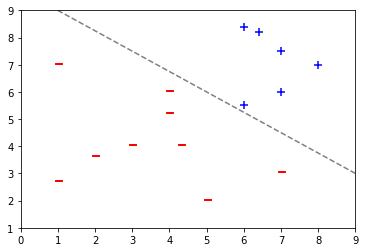

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_costs(ax, x1, x2, y):
    for i, c in enumerate(y):  
        plt.scatter(x1[i], x2[i], marker='+' if c==1 else '$-$',
                    c='b' if c==1 else 'r', s=50)

y = true_fuction_f(data)

fig, ax = plt.subplots(1)
plot_costs(ax, data[:, 0], data[:, 1], y)
plt.plot([9, 1], [3, 9], ls='--', color='grey');
plt.xlim(0, 9); plt.ylim(1, 9);


#+: 승인해야 하는 사람들 , - : 거절해야 하는 사람들

## Perceptron in a vector form
We want to implement the Perceptron in a vector form using linear algebra. We can get rid of the $> \text{threshold}$ term by introducing a dummy term $x_0$, which we always set to 1. We introduce a new weight $w_0$ corresponding to it. This lets us write our hypothesis function as

$$h(\mathbf{x}) = \text{sign}\Big[\sum\limits_{i=0}^d w_i x_i \Big]$$ (퍼셉트론을 사인 함수에 넣어주다)

$\sum\limits_{i=0}^d w_i x_i$ is called an **inner product** in linear algebra, and we can calculate it extremely quickly with `numpy.inner()` and `numpy.sign()`. It is written as

$$h(\mathbf{x}) = \text{sign}(\mathbf{w}^\mathsf{T}\mathbf{x})$$ ( = 퍼셉트론의 형태)



Here is an example for $4*1 + 3*4 + 2*7$ (weights are 4, 3 and 2, x's are 1, 4 and 7):

In [4]:
x = np.array([1, 4, 7])  #x가 1, 4, 7
w = np.array([4, 3, 2])  #weight가 4, 3, 2
np.inner(w, x)

30

Alternatively we could use `numpy.dot` to compute the same value, but inner better conveys what we are doing:

In [5]:
np.dot(w, x)  #dot으로도 연산이 가능하다

30

To cover multiple input, we can define Perceptron as below:

**Please note that in impletation we usually define data in matrix form of $[N, d]$.**

In [6]:
#위의 수식을 퍼셉트론 함수으로 정의하다
#inner, dot 아무거나 사용 가능
#h(x)=sign(wTx) 이것을 파이썬으로 구현
#사인함수 에다가 wTx 이 두개를 곱하고 inner or dot 함수에 넣어주면 된다.
#sign같은 경우 numpy에서 제공해준다.
def perceptron(weights, x):
  """
  Parameters
  ----------
  weight : np.array [d]
    The weighs of Perceptron
  X : np.array [N, d]
    The input data, form of matrix
  
  Return
  ----------
  y : np.array [N]
    The predicted output
  """
  return np.sign(np.inner(weights.T, x))  

Test on multiple inputs.

In [7]:
N = 20  
d = 2
#data가 20개이고, dimension이 2개일때 x,w를 퍼셉트론 함수에 넣어주면 1,-1 등 원하는 값을 나올 수 있게 하는  함수 짜기
#vector를 다루는 거라, dimension 다루는 게 조금 어설프다 -> transpose를 잘 구현해주어서 함수를 짜보아라
#transpose 같은 경우 w.T 로 작성해주면 된다.
x = np.random.randn(N, d)
w = np.random.rand(d, 1)
print(perceptron(w, x))

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.
   1. -1.]]


We need to add $x_0 = 1$ to our data, our data is stored in column format (each row is a separate record), so we need to add a column of ones to the left of the matrix `data` using `numpy.ones()` and `numpy.c_()` method.


In [8]:
def add_one_column(data):
    # number of data records
    N = len(data) 

    # add column of ones for x_0
    return np.c_[np.ones(N), data] 

X = add_one_column(data)
X

array([[1. , 3. , 4. ],
       [1. , 4. , 6. ],
       [1. , 4.3, 4. ],
       [1. , 8. , 7. ],
       [1. , 6. , 5.5],
       [1. , 6.4, 8.2],
       [1. , 1. , 7. ],
       [1. , 4. , 5.2],
       [1. , 7. , 7.5],
       [1. , 5. , 2. ],
       [1. , 7. , 6. ],
       [1. , 7. , 3. ],
       [1. , 6. , 8.4],
       [1. , 2. , 3.6],
       [1. , 1. , 2.7]])

## How does PLA works
We start by assigning random numbers to the weight vector. Perform the inner product against our data set. Compare to actual results.

Take *one* of the misclassified points and *nudge* the weight so that the point is no longer misclassified. This nudge fixes this point, but of course might cause one or more other points to become misclassified. But against that point we might also fix the categorization of some points as well.

$\mathbf{w}^\mathsf{T}\mathbf{x}$ is a linear operator - it creates a line. When we start with random weights this is the same as creating a random line drawn through our space. It is unlikely to correctly partition our data points correctly. When we *nudge* the weight we are shifting the line so the point is on the other side of the line. So you can visualize the algorithm as moving the line around until it correctly separates our points. 

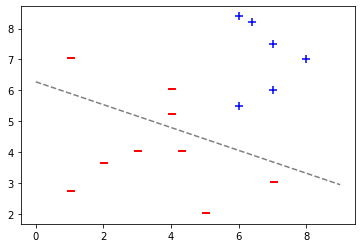

In [9]:
weights = [-8.4805, .5, 1.351] #각각 x_0, x_1, x_2에 해당하는 weight값

def plot_weight_line(ax, weights, x1, x2, color='g'):
    def eq(w, x):
        """ convert w0 + w1*x1 + w2*x2 into y = mx + b"""
        return (-w[1]*x - w[0]) / w[2] 
    ax.plot([x1, x2], [eq(weights, x1), eq(weights, x2)], ls='--', color=color)
     
def plot_weight_example(ax, weights, color='g'):
    plot_weight_line(ax, weights, 0, 9, color=color)
    plot_costs(ax, data[:, 0], data[:, 1], y)
    

#-> line과 점을 찍는 method function
#선 위의 -값들 : 틀린 답들 

fig, ax = plt.subplots(1)
plot_weight_example(ax, weights, color='grey')

And after some weight change to move the line so that the point at (4, 5.2) is on the correct side of the line:

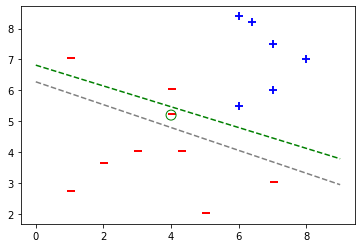

In [15]:
#틀린 - 값 위치 데이터를 이용해 weight값  다시 지정
learningRate = 0.02 # optional: will be cover
new_weights = weights + -1 * np.array([1, 4, 5.2]) * learningRate
#-1 : y값에 해당,  np.array([1, 4, 5.2]) : 주어진 x , learningRate; 얼마나 반영시킬지 조절
# 틀렸으니깐 -1을 곱해준다
#learningRate: 어느정도 반영 시킬지 정해주는 변수 , 나중에 설명할 예정
fig, ax = plt.subplots(1)
plot_weight_example(ax, weights, color='grey')
plot_weight_example(ax, new_weights, color='g')  #변한 결과를 초록색으로 그려주기
ax.scatter(4, 5.2, facecolors='none', edgecolors='g', s=100, color='green')
plt.show()

#틀린 샘플 한개를 기존의 weight에다 잘 반영시키면 변경된 weight를 잘 얻어낼 수 있다.

Lets think about the geometric interpretation of the inner product $\mathbf{w}^\mathsf{T}\mathbf{x}$.

If the inner product is positive (accept the application) then the angle formed by $\mathbf{w}$ and $\mathbf{x}$ will be acute.

If the inner product is negative (deny the application) then the angle will be oblique.

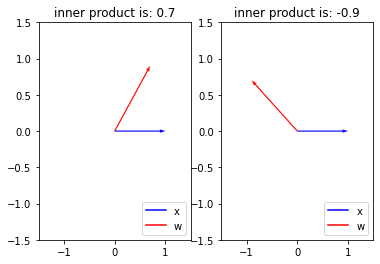

In [10]:
#벡터에 대한 inner product 설명 부분 (=강의 이론에서도 다루었다.)
#코드도 한번 살펴주면 좋을 것 같고, dot을 이런 식으로 사용한다 정도 확인해두어라
def plot_vector(ax, x, c='b', label=''):
    ax.quiver(0,0,x[0], x[1],angles='xy',scale_units='xy',scale=1, color=c)
    ax.plot([0], [0], color=c, label=label)

x = [1.0, 0.0]

fig, ax = plt.subplots(1, 2)

w = [.7, 0.9]
plot_vector(ax[0], x, 'b', 'x')
plot_vector(ax[0], w, 'r', 'w')
ax[0].set_xlim(-1.5, 1.5); ax[0].set_ylim(-1.5,1.5);
ax[0].set_title('inner product is: {}'.format(np.dot(x, w)))
ax[0].legend(loc=4)

w = [-.9, .7]
plot_vector(ax[1], x, 'b', 'x')
plot_vector(ax[1], w, 'r', 'w')
ax[1].set_xlim(-1.5, 1.5); ax[1].set_ylim(-1.5,1.5);
ax[1].set_title('inner product is: {}'.format(np.dot(x, w)))
ax[1].legend(loc=4)

fig.show()

If the angle is acute ($h(x)$ is positive) and the point is misclassified this means the inner product is positive, but it should be negative: $y=-1$. If we add $yx$ to the weight, i.e. $-x$ the angle will be converted to an oblique angle. Likewise, if the angle is oblique ($h(x)$ is negative) and the point is misclassified then $y=+1$. If we add $yx$ to the weight, i.e $+x$ the angle will be converted to an acute angle: 

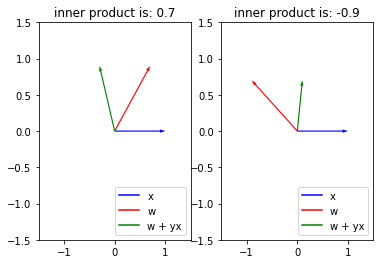

In [ ]:
#제공해준다고 넘어가지 말고, 설명도 영어이지만 살펴보고 원하면 구글 검색, 번역기 사용 권장
x = [1.0, 0.0]
w = [.7, 0.9]
_y = -1 

fig, ax = plt.subplots(1, 2)

plot_vector(ax[0], x, 'b', 'x')
plot_vector(ax[0], w, 'r', 'w')
plot_vector(ax[0], w + np.dot(_y, x), 'g', 'w + yx')
ax[0].set_xlim(-1.5, 1.5); ax[0].set_ylim(-1.5,1.5);
ax[0].set_title('inner product is: {}'.format(np.dot(x, w)))
ax[0].legend(loc=4)

w = [-.9, .7]
_y = +1
plot_vector(ax[1], x, 'b', 'x')
plot_vector(ax[1], w, 'r', 'w')
plot_vector(ax[1], w + np.dot(_y, x), 'g', 'w + yx')
ax[1].set_xlim(-1.5, 1.5); ax[1].set_ylim(-1.5,1.5);
ax[1].set_title('inner product is: {}'.format(np.dot(x, w)))
ax[1].legend(loc=4)

fig.show()
#빨간색 선: x(기존의 데이터) 와 파란색 선: 새로운 데이터  가 예각이면 ' + ' 이어야 된다.
#만약에 주어진 벡터가 -1이면 반대 방향으로 초록색 선이 변경되는게 목표이다.

#둔각인데, 실제 값이 + 이면 초록색 선이 빨간색 파란색 선 중간에 가게 된다.

#이런식으로 pla가 학습된다.

Therefore our **nudging** algorithm is very simple to implement. Choose a point such that $\text{sign}(\mathbf{w}^\mathsf{T}\mathbf{x}_n) \neq y_n$, which means it is misclassified. Update the weight with $\mathbf{w} \gets \mathbf{w} +y_n\mathbf{x}_n$. 

The PLA runs in a loop:

```python
while some point is misclassified:
    randomly choose a miscategorized point i
    w = w + y_i * x_i

#pla가 동작하는 방법은 틀린 애를 하나 찾아와서,  그 정보를 이용해
#가존의 w에 반영해주면 새로운 w를 얻을 수 있다.
#여기에는 없지만, learning rate를 넣어 학습 정도를 지정해 줄 수 있다.
```

PLA will not converge if the data is not linearly separable so we need to add checks for the number of iterations, and we also need to return a `success` flag indicating whether we found an answer or not. We use `numpy.random.permutation()` to randomly iterate over the points. If you don't do this you can easily enter into an infinite loop since you can endless fix point 1, which misclassifies point 2. You fix point 2, which misclassifies point 1, ad infinitum. 

### practice    
    
    for i in np.random.permutation(indexes):
        if perceptron(weights, X[i]) == -1: 
            print(perceptron(weights, X[i]))
            weights =  weights  + -1 * X[i]* learningRate
            print(weights)
            misclassified= True
        else:
            print(perceptron(weights, X[i]))
            success = True




    
    
      if perceptron(weights, X)[i] != y[i]:
        misclassified = True
        weights += y[i] * X[i] * learningRate

In [17]:
#pla 함수 완성하기
def PLA(X, y, weights=None, max_iters=50000, learningRate=1,
        verbose=False, skip=1, ):    
    #기본적으로 X, y, 현상태 weight들을 입력으로 넣어주고 몇번 iteration 할 것인지도 입력으로 받는다.
    #learingRate도 받지만 직접 제공해주지 않으면, 기본값 1로 설정
    #initial weight을 제공해주면 그걸 쓰고, 그렇지 않으면 랜덤으로 만드는 방식으로 하다.
  if weights is None:
      weights = np.array(np.random.random(X.shape[1]))

  misclassified = True  #맨처음에는 misclassified가 존재한다고 가정 
  success = False #이제 막 시작했으니깐, 잘 분류했는지 안했는지도 False인 상태
  iters = 0 #iteration도 0이다.
  indexes = range(len(X))  #각각 데이터에 있는 index를 다루는 부분

#iteration을 y문을 통해 계속 반복하다.
  while misclassified and iters < max_iters:   #엄청나게 여러번 돌아도 misclassified가 완벽하게 분리가 안되면 끝날 수 있도록 iters < max_iters 텀을 추가로 두다
    if verbose and iters % skip==0:
      fig, ax = plt.subplots(1)
      plot_costs(ax, X[:, 1], X[:, 2], y)
      margin = 1
      plt.xlim([np.min(X[:, 1]-margin), np.max(X[:, 1])+margin])
      plt.ylim([np.min(X[:, 2]-margin), np.max(X[:, 2])+margin])
      plot_weight_line(ax, weights, 0, 9)
      plt.title('iteration %d'%iters)
      plt.show()    
#if문 안 부분은 데이터가 잘 학습되고 있는지 확인할 수 있게 짠 부분, 무시해도 된다. 
    misclassified = False# 일단은 막 시작했으니깐 misclassification이 False라고  잘 되었다고 가정하고 들어가 보겠다.

    ######### complete the code #########
    for i in np.random.permutation(indexes):
#처음부터 index 모두 다 잘 살펴보아도 좋지만 랜덤으로 한번 섞어보고 
#받아온 데이터가 틀렸는지 안틀렸는지 확인한 다음에
#만약에 틀렸다면  데이터를 받아와서 new_weights = weights + -1 * np.array([1, 4, 5.2]) * learningRate 이런식으로 해주다
#그리고 misclassified을 확인했기 때문에 misclassified= True로 넣어주다


      
      if perceptron(weights, X)[i] != y[i]:
        misclassified = True
        weights += y[i] * X[i] * learningRate
#그래서 작성해야 할 부분은 data 매번 하나씩 받아와서 그게 misclassifiacation이 되는지 안되는지 판단하고
#만약 그게 misclassifiacation 이면 weight를 업데이터 시켜라
#그게 한번에 while문이 반복되는 부분이다. 이부분만 기억해주면 된다,
#pla 관련 구글 참조해도 좋거나, 직접 짜도 좋다



#정답과 퍼셉트론이 예측한게 맞는지 확인하려면 inference 결과값을 확인해야 한다.
#그때는 위에서 내가 짰던 def perceptron을 가져와서 사용하면 된다

#결과적으로 내가 짜야하는건 perceptron과 perceptron learining algorithm
    #####################################
    #while some point is misclassified:     - 이부분을 구현 하는 것을 목표로 한다,
    #randomly choose a miscategorized point i
    #w = w + y_i * x_i

#만약에 한번도 틀린게 발생하지 않는다고 하면 misclassified = False이 그대로 나오니 success = True로 바꾸어주면 된다.
#실제로 짜야하는 code 줄은 4~5 줄 정도 될 것 이다
    success = not misclassified
#while문이 한번 돌아가면 iteration을 한번 올려준다 
    iters += 1
    
  return weights, success, iters

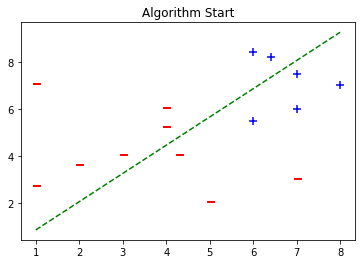

In [18]:
#실제로 예제로 확인해보다
from numpy.random import randn
#안 좋은 상황부터 시작하기 위해 임의의 값으로 hard coding하다
initialWeights = np.array([-0.32551368, 1.20473617, -1.00629554])
#initialWeights으로 시작한게, 초록색 선이다.
# plot initial setup
fig, ax = plt.subplots(1)

plot_weight_line(ax, initialWeights, np.min(X[:, 1]), np.max(X[:, 1]))
plot_costs(ax, X[:, 1], X[:, 2], y)
plt.title('Algorithm Start')
plt.show()

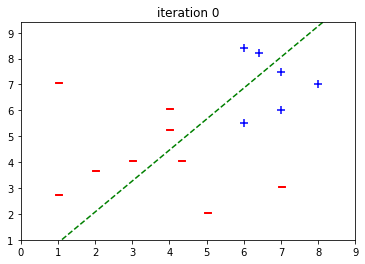

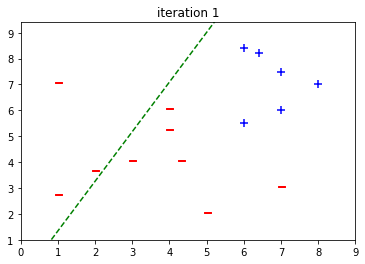

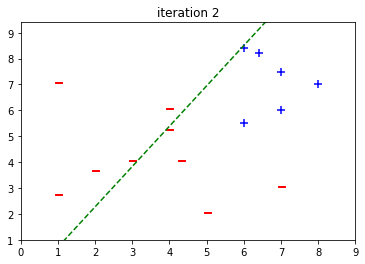

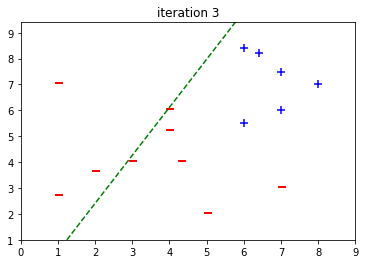

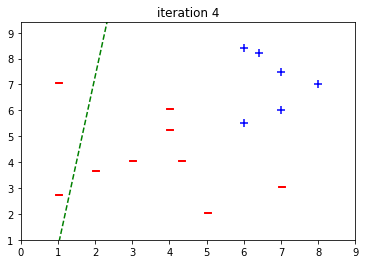

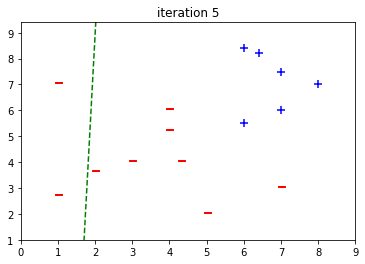

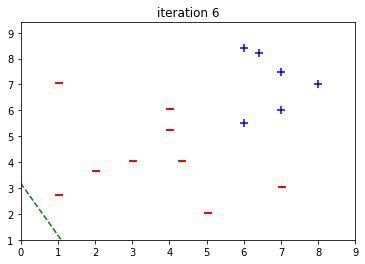

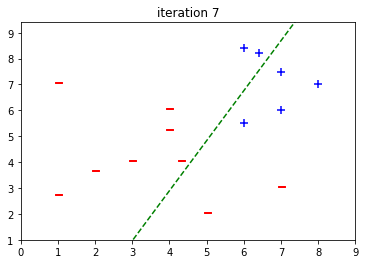

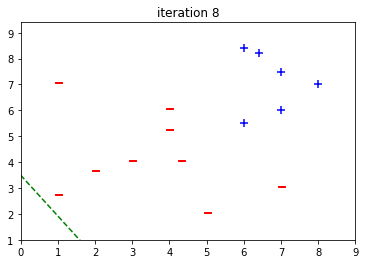

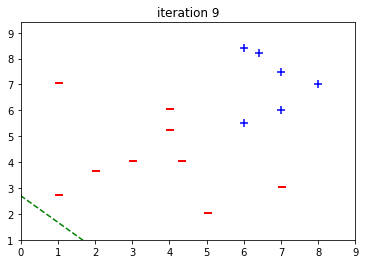

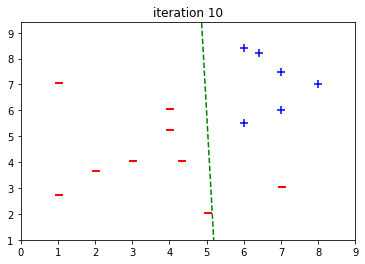

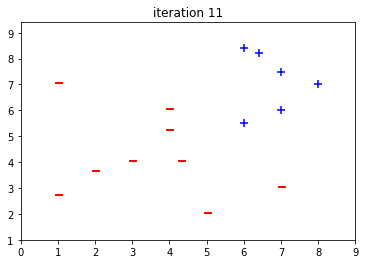

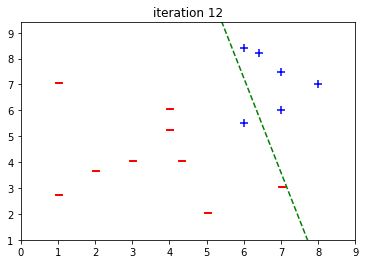

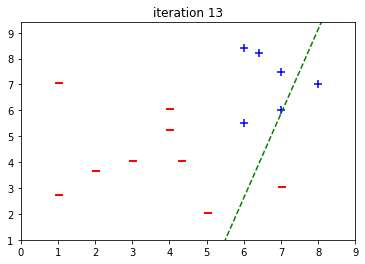

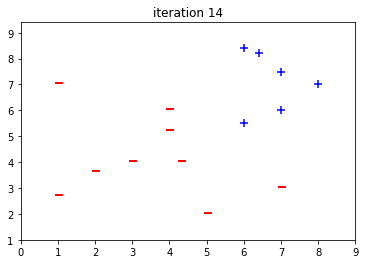

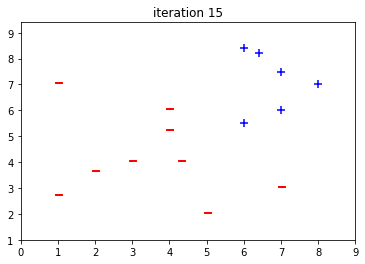

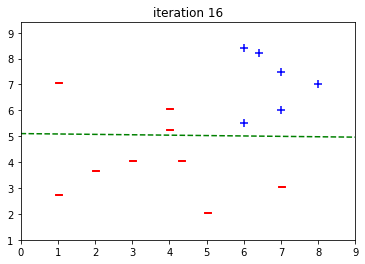

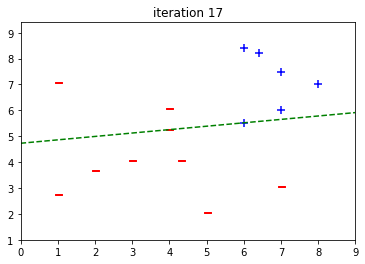

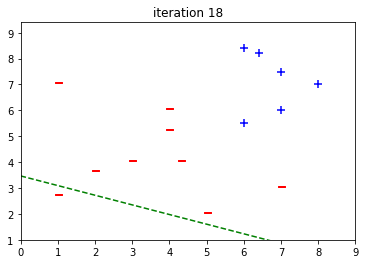

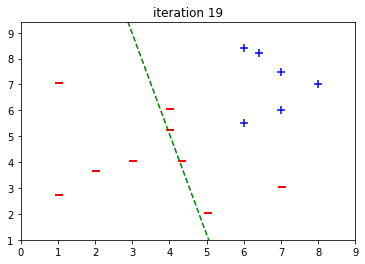

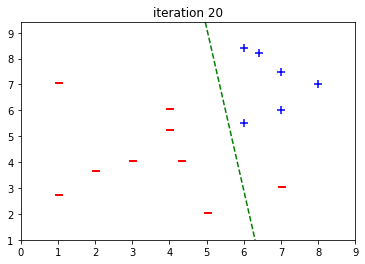

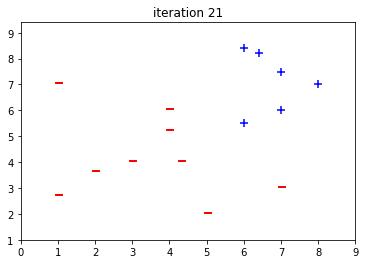

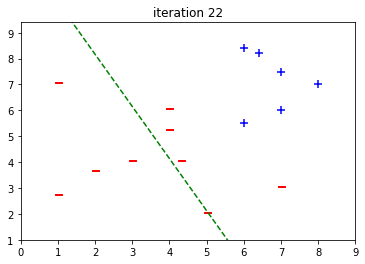

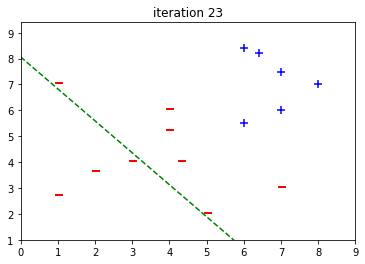

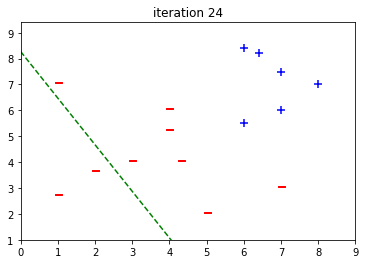

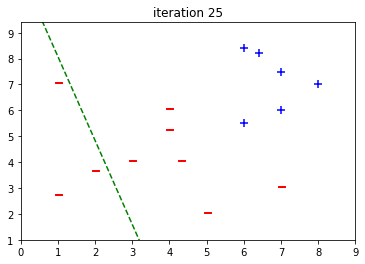

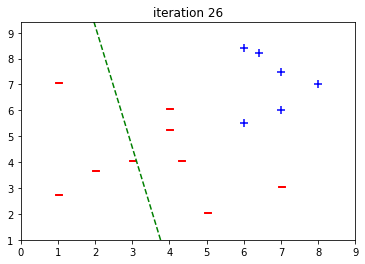

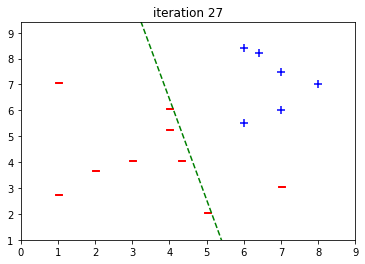

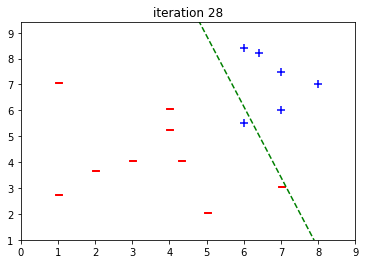

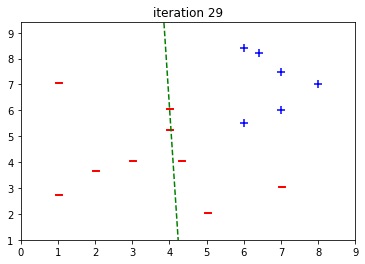

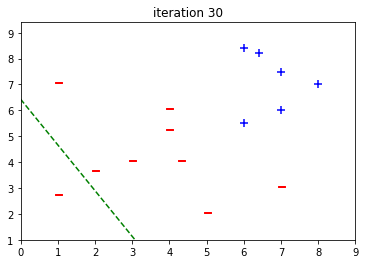

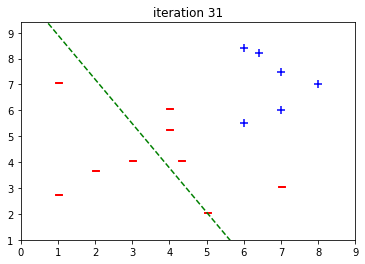

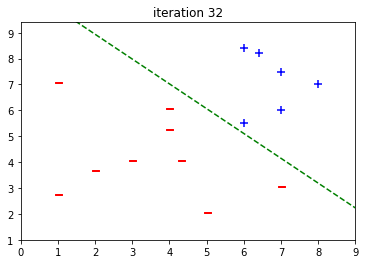

In [19]:
# run PLA
weights, success, iters = PLA(X, y, initialWeights, learningRate=0.05,
                              verbose=True, skip=1)

#pla를 정상적으로 짰다고 하면 iteration이 반복되면서 pla가 조금씩 달라지는 것을 확인할 수 있다.
#반복하다 보면 24번 그림처럼 진행되는 것을 확인 할 수 있다.


final weights [-2.02551368  0.08973617  0.27370446]
numer of iterations 25


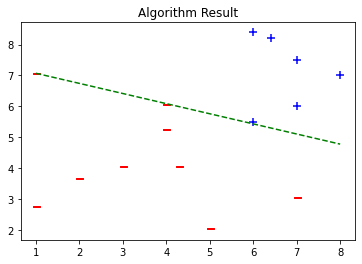

In [ ]:
# plot and print the results
#반복하다보면 randome seed때문에 조금씩 달라질 수 있지만, 주어진 데이터에 대해서 완벽하게 나누게 된다.
#그떄 받아온 weight으로 새로 그려주면 아래 그림처럼 나온다.
fig, ax = plt.subplots(1)
plot_costs(ax, X[:, 1], X[:, 2], y)
print('final weights', weights)
plot_weight_line(ax, weights,
                 np.min(X[:, 1]), np.max(X[:, 1]))
plt.title('Algorithm Result')
print('numer of iterations', iters)


---

# 2. Hoeffding Inequality (\# of data, $N$)

## w/ Non-Linearably Separable Simulated Data


It should be reasonably clear to see why PLA cannot separate data which is very intermingled. It draws a straight line, and there is no way to draw a straight line through intermingled data to separate it into two groups. But how does it perform if the data is mostly separated with only modest overlap? Let's look at that.

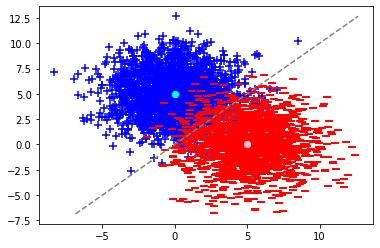

In [ ]:
np.random.seed(0)

def make_symmetricData(N):
  noise = 5
  d1 = np.random.multivariate_normal((0, 5), ((noise, 0), (0, noise)), N)    
  d2 = np.random.multivariate_normal((5, 0), ((noise, 0), (0, noise)), N)
    
  data = np.vstack((d1, d2))
  y = np.array([1]*N + [-1]*N)
  return data, y
  
X, y = make_symmetricData(N=2000)   #2000개 데이터 전체 데이터라 가정
trueWeight = np.array([0, -1, 1])

fig, ax = plt.subplots(1)
plot_costs(ax, X[:, 0], X[:, 1], y)

plt.scatter(0, 5, c='aqua', marker='o', s=40)
plt.scatter(5, 0, c='pink', marker='o', s=40)
plot_weight_line(ax, trueWeight, np.min(X[:, 1]), np.max(X[:, 1]), color='grey')

There is no way to linearly separate this data. Let's test that by running the algorithm and inspecting the `success` flag.

In [ ]:
N = 10  #10개만 뽑아와서 pla
sampleIdx = np.random.choice(X.shape[0], N, replace=False)

sample_X = X[sampleIdx, :]
sample_y = y[sampleIdx]

sample_X = add_one_column(sample_X)  #데이터 만들고
weights, success, iters = PLA(sample_X, sample_y, max_iters=5000) #pla 돌리면
print('success =', success)

success = True


As you can see the algorithm could not linearly separate the data. But what do the results look like:

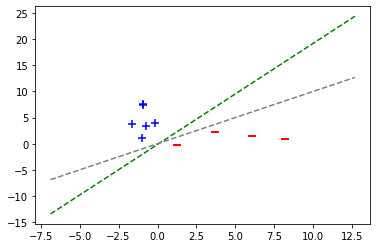

In [ ]:
fig, ax = plt.subplots(1)
plot_costs(ax, sample_X[:, 1], sample_X[:, 2], sample_y)
plot_weight_line(ax, weights, np.min(X[:, 1]), np.max(X[:, 1]))
plot_weight_line(ax, trueWeight, np.min(X[:, 1]), np.max(X[:, 1]), color='grey')
#초록색의 퍼셉트론을 g optimal 하다
#완벽하게 seperate 되는 데이터가 나오다
#회색 그래프 f가 true function

In [ ]:
from sklearn.metrics import accuracy_score

pred_sample_y = perceptron(weights, sample_X)
inSampleError = 1 - accuracy_score(sample_y, pred_sample_y)  #inSampleError: 뽑은 데이터에 대한 error 측정 = training error
#traing error는 몇개를 맞추었는지 비율을 뽑은 다음1을 빼다
print('in sample error: %.4f'%inSampleError)

pred_y = perceptron(weights, add_one_column(X))
outOfSampleError = 1 - accuracy_score(y, pred_y) #셈플 말고 전체 데이터(=2000개 데이터)에 대해 error 측정

print('out of sample error: %.4f'%outOfSampleError)
#주어진 데이터에서는 error가 발생하지 않았지만
#실제 전체 데이터에서는 error가 발생했다.
#실제로 outofsample을 면밀하게 확인하려면 회색 선과 초록색 선 사이의 gap이 얼마나 되는지 측정해야 한다.
#error을 줄일려면 어떻게 해야할까?(=bad event를 줄이기) 학습 데이터 수 증가를 하면 된다. 

in sample error: 0.0000
out of sample error: 0.0773


Even though the perceptron can not seperate all the data, the solution is pretty good and there are a gap between two lines. What might happen if we aquire more data?



success = False


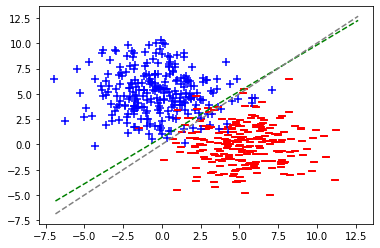

In [ ]:
N = 500  #학습 데이터 10개에서 500개로 증가
sampleIdx = np.random.choice(X.shape[0], N, replace=False)

sample_X = X[sampleIdx, :]
sample_y = y[sampleIdx]

sample_X = add_one_column(sample_X)
weights, success, iters = PLA(sample_X, sample_y, max_iters=5000)
print('success =', success)

fig, ax = plt.subplots(1)
plot_costs(ax, sample_X[:, 1], sample_X[:, 2], sample_y)
plot_weight_line(ax, weights, np.min(X[:, 1]), np.max(X[:, 1]))
plot_weight_line(ax, trueWeight, np.min(X[:, 1]), np.max(X[:, 1]), color='grey')

#success = False: 완벽하게 seperate 하지 않았다고 말함, 
# 그래도 얻어낸 퍼셉트론의 결과를 보니 10개 학습데이터 결과보다 target function과 유사하게 나온것을 확인할 수 있다.
#=  회색, 초록색 선 사이의 공간이 줄어듬

Now, we can see that the line of learned perceptron is much more similar to true line (grey). How about the errors?



In [ ]:
pred_sample_y = perceptron(weights, sample_X)
inSampleError = 1 - accuracy_score(sample_y, pred_sample_y)
print('in sample error: %.4f'%inSampleError)

pred_y = perceptron(weights, add_one_column(X))
outOfSampleError = 1 - accuracy_score(y, pred_y)

print('out of sample error: %.4f'%outOfSampleError)
#in sample error가 생기고, out of sample error는 전보다 더 낮아졌다.
#데이터가 많아지면 in sample error가 out of sample error과 매우 유사해진다. (<- 이론 수업에서도 확인한 부분)

#주어진 데이터를 완벽하게 맞추는 것보다 실제로는  out of sample error를 낮추고
# out of sample error를 바로 계산할 수 없기에, 
# #in sample error와  out of sample error를 비슷하게 하면서 in sample error도 낮춰주는게
#learing의 최종 목표

in sample error: 0.0560
out of sample error: 0.0535


## w/ Real Data
Let's repeat the samething with real data, `breast_cancer`.

**Note** Assume the data represents true distribution, even though it is not. 

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

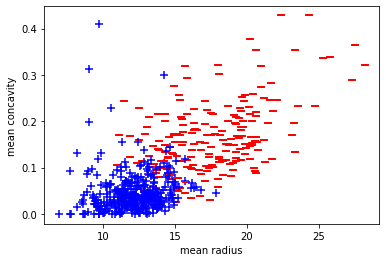

In [ ]:
X = data.data[:, [0, 6]]#1, 7번째 정보값만 확인
y = data.target
y[y==0] = -1

fig, ax = plt.subplots(1)
plot_costs(ax, X[:, 0], X[:, 1], y)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[6])
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.show()

#유방암 데이터 세부 종류가 많지만, 데이터 확인 쉽게 하기 위해 two-dimension만 확인
#하나가 악성암이고 다른 하나는 약성 암

Let's train the PLA with 10 sampled data.

In [ ]:
N = 10 #10개만 데이터학습에 사용
sampleIdx = np.random.choice(X.shape[0], N, replace=False)

sample_X = X[sampleIdx, :]
sample_X = add_one_column(sample_X)

sample_y = y[sampleIdx]

In [ ]:
weights, success, iters = PLA(sample_X, sample_y, max_iters=5000)
print('success =', success)

success = True


(-0.02134, 0.44814000000000004)

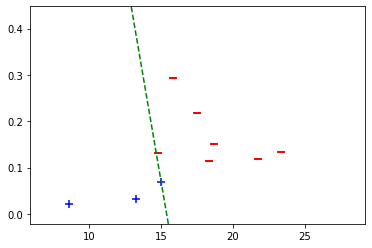

In [ ]:
fig, ax = plt.subplots(1)
plot_costs(ax, sample_X[:, 1], sample_X[:, 2], sample_y)
plot_weight_line(ax, weights,
                 np.min(sample_X[:, 1]), np.max(sample_X[:, 1]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)

The `inSampleError` (training error) is 0, which is perfect. But `outSampleError` is not, which means that the gernalized performance is poor.

In [ ]:
pred_sample_y = perceptron(weights, sample_X)
inSampleError = 1 - accuracy_score(sample_y, pred_sample_y)
print('in sample error: %.4f'%inSampleError)

pred_y = perceptron(weights, add_one_column(X))
outOfSampleError = 1 - accuracy_score(y, pred_y)

print('out of sample error: %.4f'%outOfSampleError)
#in sample error와 out sample error에서 gap이 발생 

in sample error: 0.0000
out of sample error: 0.1037


Then let's acquire more data and train the Perceptron.

In [ ]:
N = 250  #학습 데이터 늘림
sampleIdx = np.random.choice(X.shape[0], N, replace=False)

sample_X = X[sampleIdx, :]
sample_X = add_one_column(sample_X)

sample_y = y[sampleIdx]

In [ ]:
weights, success, iters = PLA(sample_X, sample_y,
                              max_iters=50000, learningRate=0.05)
print('success =', success)

success = False


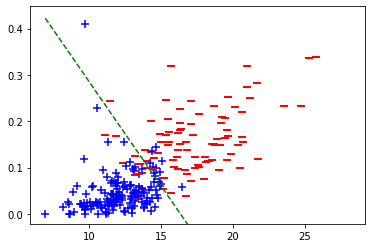

In [ ]:
fig, ax = plt.subplots(1)
plot_costs(ax, sample_X[:, 1], sample_X[:, 2], sample_y)
plot_weight_line(ax, weights, np.min(sample_X[:, 1]), np.max(sample_X[:, 1]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Though `inSampleError` has been increased, `outSampleError` has decreased.

In [ ]:
pred_sample_y = perceptron(weights, sample_X)
inSampleError = 1 - accuracy_score(sample_y, pred_sample_y)
print('in sample error: %.4f'%inSampleError)

pred_y = perceptron(weights, add_one_column(X))
outOfSampleError = 1 - accuracy_score(y, pred_y)

print('out of sample error: %.4f'%outOfSampleError)
#in sample error은 올라갔지만, out of sample은 줄어듬

in sample error: 0.1080
out of sample error: 0.0896


Now we have shown that the data can boost `generalization` performance of model which was claimed by Hoeffiding Inequality. 

데이터를 늘리면  `generalization`을 올려줄 수 있었다.

How about `approximation`? It will be cover effect we learn more complex models.

 `approximation`: traing data에 얼마나 fitting 시킬 수 있는 능력을 갖고 있는지

 -> complex 한 model을 가지고 오면 가능하다.
 
지금까지 배운 건 퍼셉트론 밖에 없었다. 앞으로 많은 모델들로

 `approximation`이 올라감에 따라  `generalization`이 어떻게 되는지 확인해 보겠다.
 
Can PLA can considers user specified `error`?

악성과 양성 중요도를 고려해서 pla를 할 수 있느냐? -> pla는 그렇지 못하다.

중요도 고려한 다른 방법들은 다음 수업에서 할 것이다.